<a href="https://colab.research.google.com/github/dell-datascience/Inage_classifier/blob/main/Extract_analyze_defect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
Definition
In this script i seek to mine from MMonCa logfile the  interstitial, vacancy, Helium and all generated versions of thier clusters
I resorfted to this procedure due to the restricted nature in how MMonCa extracts defects.
The extract command requires an upfront definition of the defect or clusters to extract.This can be determined only after simulation is completed
Help [report defect] command, is used to output all defects in the simulation for every simulation epoch

Here i mine the HenVm, HenIm (n>1,m>1 ) from each of the 10 simulation logfiles
The ratio of He trapped in interstitial, vacancies and their clusters are calculated and ploted against the time simulated  
'''

import pandas as pd
import numpy as np
from os import listdir
import re
import matplotlib.pyplot as plt
%matplotlib inline
import collections
import seaborn as sb
%config InlineBackend.figure_format = 'retina'
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/research/pulse_logfiles' 
% ls-l

In [79]:
files=list(listdir('/content/drive/MyDrive/research/pulse_logfiles'))   #Return a list containing the names of the files in the directory
def convert(str):
    return int("".join(re.findall("\d", str)))                           #isolate the digits
files.sort(key=convert)
files

['1KeV.mc.log',
 '2KeV.mc.log',
 '5KeV.mc.log',
 '10KeV.mc.log',
 '15KeV.mc.log',
 '20KeV.mc.log',
 '25KeV.mc.log',
 '30KeV.mc.log',
 '35KeV.mc.log',
 '40KeV.mc.log']

In [76]:
                                                                                            # in this code i aim to extract the defect log from MMonCa logfile and analyse the defects
def analyze(aa):
  dic={}                                                                                      #dictionary to hold values for each run
  mydata=[]                                                                                   #list to append data
  start,end=[],[]                                                                             #get the beginning and end of the lines for each run
  trap=0 
  total_trapped=[]
  num=161 
  a=aa                                                                                       #number of run
  pka=files[a]
  data=open(pka,'rt')                                                                         #open the logfile as readtext
  for j in range(2,num+1,1):                                                                  #iterator to loop through logfile based on number of runs
    data=open(pka)                                                                            #open the log file 
    for i,line in enumerate(data):                                                            #loop logfile
      if line.startswith('{} start'.format(j)):                                               #select start line number 
        start.append(i)
      if line.startswith('{} end'.format(j)):                                                 #select end line number 
        end.append(i)

  data=open(pka,'rt')                                                                         #open the logfile as readtext
  for line in data:                                                                           #iterate over each line in data 
    mydata.append(line.rstrip())                                                              #append line from data to list
  for i in range(1,len(start)+1):                                                             #iterate over each run a 
    val=mydata[start[i-1]+7:end[i-1]]                                                         #extract the defects from logfile
    dic[i]=dic.get(i,val)                                                                     #add values to dictionary

  for epoch in range(1,len(dic)+1,1):                                                         #iteration number
    for idx in range(0,len(dic[epoch])):                                                      #for each iteration 
      if (re.findall('He(\d)\S+',dic[epoch][idx]) or re.findall('He[A-Z]',dic[epoch][idx]) ): #if HenVn or HenIn or HeV or Hen 
        # print(re.findall('He.+',dic[epoch][idx]))      #checkpoint                          # display epoch defects stats
        size=(re.findall('\S.+/He(\d)',dic[epoch][idx]))                                      #take He cluster size (Hen->n)
        try: size[0]                                                                          #if cluster size is empty
        except:size.append(1)                                                                 #append 1 
        count=re.findall('/He.+(..\d)',dic[epoch][idx])                                       #take count
        size,count=int(size[0]),int(count[0])                                                 #convert to int
        # print(size,count)                               #checkpoint                         #Number of He in Hen or HeI, count 
        trap+=size*count
    total_trapped.append(trap)
    trap=0                                                                                    #reinitialize trap to zero to prevent cumulative add
  return total_trapped                                                                        #return total_trapped                     

In [83]:
KeV_1=analyze(0)
KeV_2=analyze(1)
KeV_5=analyze(2)
KeV_10=analyze(3)
KeV_15=analyze(4)
KeV_20=analyze(5)
KeV_25=analyze(6)
KeV_30=analyze(7)
KeV_35=analyze(8)
KeV_40=analyze(9)

In [88]:
trapped=[KeV_1,KeV_2,KeV_5,KeV_10,KeV_15,KeV_20,KeV_25,KeV_30,KeV_35,KeV_40]
len(trapped[9])

160

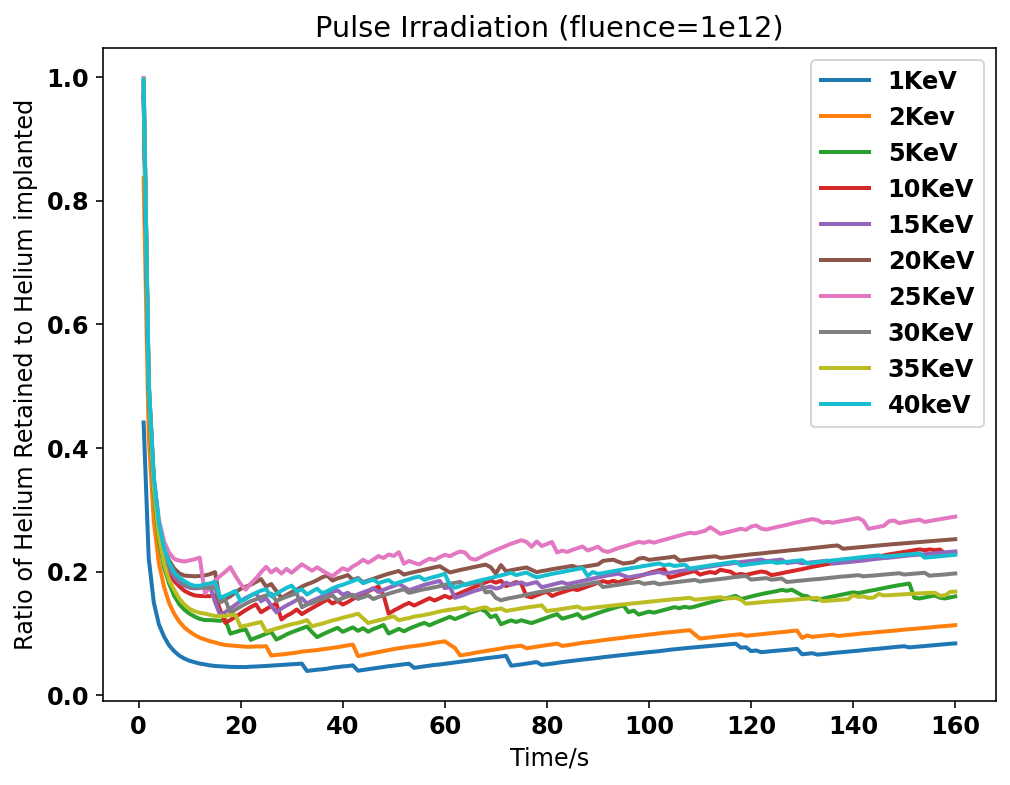

In [106]:
inserted=[x*2400 for x in np.arange(1,161)]
r1=np.divide(trapped[0],inserted)
r2=np.divide(trapped[1],inserted)
r5=np.divide(trapped[2],inserted)
r10=np.divide(trapped[3],inserted)
r15=np.divide(trapped[4],inserted)
r20=np.divide(trapped[5],inserted)
r25=np.divide(trapped[6],inserted)
r30=np.divide(trapped[7],inserted)
r35=np.divide(trapped[8],inserted)
r40=np.divide(trapped[9],inserted)

time=np.arange(1,161)
plt.rcParams.update({'font.size': 12,'font.weight':'bold'})
fig, ax =plt.subplots(figsize=(8,6))
ax.plot(time,r1, linewidth=2, label='1KeV')
ax.plot(time,r2, linewidth=2, label='2Kev')
ax.plot(time,r5, linewidth=2, label='5KeV')
ax.plot(time,r10, linewidth=2, label='10KeV')
ax.plot(time,r15, linewidth=2, label='15KeV')
ax.plot(time,r20, linewidth=2, label='20KeV')
ax.plot(time,r25, linewidth=2, label='25KeV')
ax.plot(time,r30, linewidth=2, label='30KeV')
ax.plot(time,r35, linewidth=2, label='35KeV')
ax.plot(time,r40, linewidth=2, label='40keV')
ax.set_xlabel('Time/s')
ax.set_ylabel('Ratio of Helium Retained to Helium implanted')
ax.set_title('Pulse Irradiation (fluence=1e12)');
ax.legend(facecolor ='white',loc='upper right',)
